In [1]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
import os # accessing directory structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
##
df = pd.read_csv("df_5_classes.csv")

In [20]:
os.listdir()

['.ipynb_checkpoints',
 '6-class-data',
 'Compare between datasets',
 'df_5_classes',
 'df_5_classes.csv',
 'Emotion Detection from Text.zip',
 'emotion-labels-test.csv',
 'emotion-labels-train.csv',
 'emotion-labels-val.csv',
 'Emotion_Classification_4_classes.ipynb',
 'emotion_detection_4classes-DL.ipynb',
 'emotion_detection_4classes.ipynb',
 'emotion_detection_5classes.ipynb',
 'emotion_detection_5classes_2nd.ipynb',
 'emotion_detection_5_classes_DL.ipynb',
 'model.h5',
 'New_version_emotion_FAIL.ipynb',
 'text_emotion.csv',
 'text_emotion.csv.zip',
 'tweet_emotions.csv']

In [21]:
df.head()

,Unnamed: 0,tweet_id,sentiment,content,char_length,token_length
0,1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,60,11
1,2,1956967696,sadness,Funeral ceremony...gloomy friday...,35,3
2,4,1956968416,neutral,@dannycastillo We want to trade with someone w...,86,15
3,5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,84,15
4,6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",132,26


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31313 entries, 0 to 31312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    31313 non-null  int64 
 1   tweet_id      31313 non-null  int64 
 2   sentiment     31313 non-null  object
 3   content       31313 non-null  object
 4   char_length   31313 non-null  int64 
 5   token_length  31313 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [23]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Dataset Info  DESCRIPTION
--------------------------
Dataset Info  shape: (31313, 6) 

Dataset Info  contains: 0  null values

Label counts:
neutral      8638
worry        8459
happiness    5209
sadness      5165
love         3842
Name: sentiment, dtype: int64

***** Dataset Info  label count plot ****


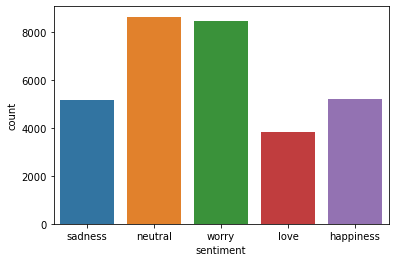

In [26]:
describe_data("Dataset Info",df,"sentiment")

In [27]:
vocab_size = 10000
len_sentence = 160

In [28]:
df["length"] = [len(i) for i in df["content"]]

In [29]:
print(df["length"].max())
print(df["length"].min())

167
1


In [44]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "sadness":0,
        "neutral":1,
        "worry":2,
        "love":3,
        "happiness":4
    }
    )
    return labels

In [45]:
df["label"]=label_encode(df,"sentiment")

In [46]:
df.head()

,Unnamed: 0,tweet_id,sentiment,content,char_length,token_length,length,label
0,1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,60,11,60,0
1,2,1956967696,sadness,Funeral ceremony...gloomy friday...,35,3,35,0
2,4,1956968416,neutral,@dannycastillo We want to trade with someone w...,86,15,86,1
3,5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,84,15,84,2
4,6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",132,26,132,0


In [47]:
df.sentiment.unique()

array(['sadness', 'neutral', 'worry', 'love', 'happiness'], dtype=object)

In [48]:
df.sentiment.value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
love         3842
Name: sentiment, dtype: int64

In [49]:
df.label.value_counts()

1    8638
2    8459
4    5209
0    5165
3    3842
Name: label, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31313 entries, 0 to 31312
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    31313 non-null  int64 
 1   tweet_id      31313 non-null  int64 
 2   sentiment     31313 non-null  object
 3   content       31313 non-null  object
 4   char_length   31313 non-null  int64 
 5   token_length  31313 non-null  int64 
 6   length        31313 non-null  int64 
 7   label         31313 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.9+ MB


<AxesSubplot:xlabel='length', ylabel='Density'>

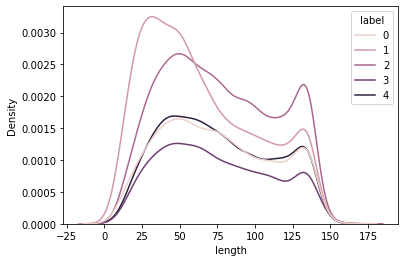

In [51]:
sns.kdeplot(x=df["length"], hue=df["label"])

In [52]:
def text_preprocess(data, column):
    print(data.shape)
    lemmatizer = WordNetLemmatizer()
    corpus = []
    
    for text in data[column]:
        text = re.sub("[^a-zA-Z0-9]", " ", text)
        
        text = text.lower()
        text = text.split()
        
        text = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(text)
        
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    embeddec_doc = pad_sequences(sequences=one_hot_word,
                              maxlen=len_sentence,
                              padding="pre")
    print(data.shape)
    return embeddec_doc

In [57]:
df.head()

,Unnamed: 0,tweet_id,sentiment,content,char_length,token_length,length,label
0,1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,60,11,60,0
1,2,1956967696,sadness,Funeral ceremony...gloomy friday...,35,3,35,0
2,4,1956968416,neutral,@dannycastillo We want to trade with someone w...,86,15,86,1
3,5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,84,15,84,2
4,6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",132,26,132,0


In [62]:
X = df['content']
y = df['label']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [75]:
X_train_p=text_preprocess(X_train, "content")

(25050, 1)
(25050, 1)


In [76]:
X_test_p=text_preprocess(X_test, "content")

(6263, 1)
(6263, 1)


In [77]:
X_train_p

array([[   0,    0,    0, ..., 6942, 5865, 1680],
       [   0,    0,    0, ..., 7404, 8887, 6194],
       [   0,    0,    0, ..., 1685, 8213, 8314],
       ...,
       [   0,    0,    0, ..., 8321, 8384, 5812],
       [   0,    0,    0, ..., 2607, 1666, 8902],
       [   0,    0,    0, ..., 9626, 1635, 6585]])

In [78]:
encoder = OneHotEncoder()
y_train = np.array(y_train)
y_train = encoder.fit_transform(y_train.reshape(-1,1)).toarray()

In [79]:
y_test = np.array(y_test)
y_test = encoder.fit_transform(y_test.reshape(-1,1)).toarray()

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25050, 1)
(25050, 5)
(6263, 1)
(6263, 5)


In [82]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 160, 160)          1600000   
_________________________________________________________________
dropout (Dropout)            (None, 160, 160)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               147968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3

In [84]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
hist = model.fit(X_train_p, y_train, epochs = 20, batch_size = 64, validation_data=(X_test_p, y_test),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
392/392 [==============================] - 160s 403ms/step - loss: 1.6019 - accuracy: 0.2666 - val_loss: 1.3899 - val_accuracy: 0.4024

Epoch 00001: val_accuracy improved from -inf to 0.40236, saving model to .\model.h5
Epoch 2/20
392/392 [==============================] - 182s 464ms/step - loss: 1.2927 - accuracy: 0.4537 - val_loss: 1.3311 - val_accuracy: 0.4340

Epoch 00002: val_accuracy improved from 0.40236 to 0.43398, saving model to .\model.h5
Epoch 3/20
392/392 [==============================] - 215s 548ms/step - loss: 1.1637 - accuracy: 0.5159 - val_loss: 1.3754 - val_accuracy: 0.4244

Epoch 00003: val_accuracy did not improve from 0.43398
Epoch 4/20
392/392 [==============================] - 216s 552ms/step - loss: 1.0632 - accuracy: 0.5749 - val_loss: 1.4359 - val_accuracy: 0.4123

Epoch 00004: val_accuracy did not improve from 0.43398
Epoch 5/20
392/392 [==============================] - 231s 590ms/step - loss: 0.9756 - accuracy: 0.6216 - val_loss: 1.4896 - val_ac

In [85]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 160, 160)          1600000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 160, 160)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               36992     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [87]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
hist = model.fit(X_train_p, y_train, epochs = 20, batch_size = 64, validation_data=(X_test_p, y_test),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
392/392 [==============================] - 51s 128ms/step - loss: 1.6075 - accuracy: 0.2626 - val_loss: 1.5665 - val_accuracy: 0.2864

Epoch 00001: val_accuracy improved from -inf to 0.28644, saving model to .\model.h5
Epoch 2/20
392/392 [==============================] - 55s 140ms/step - loss: 1.5477 - accuracy: 0.2933 - val_loss: 1.5472 - val_accuracy: 0.2930

Epoch 00002: val_accuracy improved from 0.28644 to 0.29299, saving model to .\model.h5
Epoch 3/20
392/392 [==============================] - 54s 138ms/step - loss: 1.4336 - accuracy: 0.3725 - val_loss: 1.4494 - val_accuracy: 0.3541

Epoch 00003: val_accuracy improved from 0.29299 to 0.35414, saving model to .\model.h5
Epoch 4/20
392/392 [==============================] - 52s 133ms/step - loss: 1.2752 - accuracy: 0.4605 - val_loss: 1.4452 - val_accuracy: 0.3677

Epoch 00004: val_accuracy improved from 0.35414 to 0.36772, saving model to .\model.h5
Epoch 5/20
392/392 [==============================] - 52s 132ms/step - 

In [88]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 160, 160)          1600000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 160, 160)          0         
_________________________________________________________________
gru (GRU)                    (None, 128)               111360    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [90]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
hist = model.fit(X_train_p, y_train, epochs = 20, batch_size = 64, validation_data=(X_test_p, y_test),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
392/392 [==============================] - 118s 295ms/step - loss: 1.5247 - accuracy: 0.3167 - val_loss: 1.3402 - val_accuracy: 0.4209

Epoch 00001: val_accuracy improved from -inf to 0.42088, saving model to .\model.h5
Epoch 2/20
392/392 [==============================] - 115s 294ms/step - loss: 1.2433 - accuracy: 0.4752 - val_loss: 1.3399 - val_accuracy: 0.4292

Epoch 00002: val_accuracy improved from 0.42088 to 0.42919, saving model to .\model.h5
Epoch 3/20
392/392 [==============================] - 117s 299ms/step - loss: 1.1272 - accuracy: 0.5406 - val_loss: 1.3932 - val_accuracy: 0.4194

Epoch 00003: val_accuracy did not improve from 0.42919
Epoch 4/20
392/392 [==============================] - 117s 297ms/step - loss: 0.9865 - accuracy: 0.6097 - val_loss: 1.4827 - val_accuracy: 0.4155

Epoch 00004: val_accuracy did not improve from 0.42919
Epoch 5/20
392/392 [==============================] - 116s 295ms/step - loss: 0.8612 - accuracy: 0.6719 - val_loss: 1.6064 - val_ac